<a href="https://colab.research.google.com/github/shrad1997/Decision_tree/blob/main/Copy_of_Decision_tree_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
company_data= pd.read_csv("/content/Company_Data.csv")

In [3]:
company_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [6]:
# CONVERTING CONTINUOS VAR INTO CATEGORICAL VAR
Sales= pd.cut(company_data.Sales,bins=[-1,7.49,16.27],labels=['Low','High']) #from 0 to 7.49(low sale) AND from 7.49 to 16.27(High sale)
company_data.insert(11,"Sales_category",Sales)

In [8]:
company_data.Sales_category.unique()

['High', 'Low']
Categories (2, object): ['Low' < 'High']

In [9]:
label_encoder = preprocessing.LabelEncoder()
company_data['ShelveLoc']= label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban']= label_encoder.fit_transform(company_data['Urban'])
company_data['US']= label_encoder.fit_transform(company_data['US'])
company_data['Sales_category']= label_encoder.fit_transform(company_data['Sales_category'])

In [10]:
company_data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [11]:
company_data['Sales_category'].unique()

array([0, 1])

In [12]:
company_data=company_data.drop("Sales",axis=1)

In [13]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CompPrice       400 non-null    int64
 1   Income          400 non-null    int64
 2   Advertising     400 non-null    int64
 3   Population      400 non-null    int64
 4   Price           400 non-null    int64
 5   ShelveLoc       400 non-null    int64
 6   Age             400 non-null    int64
 7   Education       400 non-null    int64
 8   Urban           400 non-null    int64
 9   US              400 non-null    int64
 10  Sales_category  400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [14]:
x=company_data.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y=company_data.iloc[:,10]
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales_category, Length: 400, dtype: int64

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [14]:
### Building Decision Tree Classifier using Entropy Criteria

In [31]:

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [33]:
model.classes_

array([0, 1])

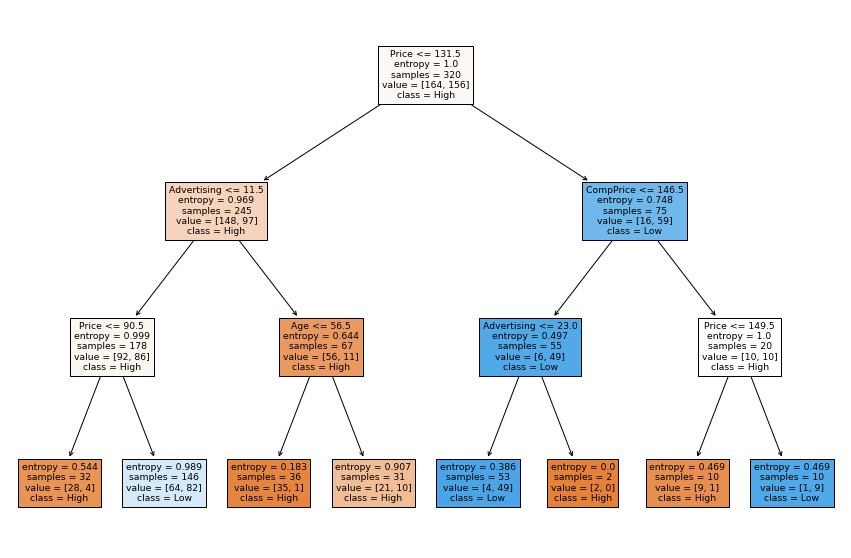

In [34]:
plt.figure(figsize=(15,10))
cn=['High','Low']
tree.plot_tree(model,filled=True,feature_names=x.columns,class_names=cn);

In [35]:
preds = model.predict(x_test)

In [36]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_category,,
0,17,18
1,7,38


In [37]:
# Accuracy 
np.mean(preds==y_test)

0.6875

In [38]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [40]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [41]:
#Prediction and computing the accuracy
pred2=model.predict(x_test)
np.mean(pred2==y_test) 

0.6875